# Level 1 
## Task 3: Exploratory Data Analysis (EDA)

This notebook provides an interactive interface for exploring cleaned datasets.

You can:
- View summary statistics
- Analyze feature distributions using histograms
- Inspect relationships with scatter plots
- Detect outliers with box plots
- Explore correlations between variables

You can either:
- Upload your own cleaned CSV file
- Or select a file from the `/data/cleaned/` directory

---

In [5]:
!pip install ipywidgets


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 🧭 Setup: Add Project Root to sys.path

To enable relative imports from the `Level1_Basic` module (or any other subdirectory), we add the project root to `sys.path`.

In [6]:
import os
import sys

# Detect paths
notebook_dir = os.getcwd()  # e.g., root/notebooks/
root_dir = os.path.abspath(os.path.join(notebook_dir, ".."))  # e.g., root/

# Show path info
print("Notebook dir:", notebook_dir)
print("Root dir:", root_dir)

# Ensure root_dir is in sys.path for module imports
if root_dir not in sys.path:
    sys.path.append(root_dir)
    print(f" Added {root_dir} to sys.path")
else:
    print(f" {root_dir} already in sys.path")

# Show current sys.path
print("📂 Current sys.path:")
for p in sys.path:
    print("  ", p)
    


Notebook dir: e:\CODveda\codveda-internship\notebooks
Root dir: e:\CODveda\codveda-internship
 e:\CODveda\codveda-internship already in sys.path
📂 Current sys.path:
   C:\Users\Kabelo Matlakala\AppData\Local\Programs\Python\Python311\python311.zip
   C:\Users\Kabelo Matlakala\AppData\Local\Programs\Python\Python311\DLLs
   C:\Users\Kabelo Matlakala\AppData\Local\Programs\Python\Python311\Lib
   C:\Users\Kabelo Matlakala\AppData\Local\Programs\Python\Python311
   e:\CODveda\codveda-internship\codveda-env
   
   e:\CODveda\codveda-internship\codveda-env\Lib\site-packages
   e:\CODveda\codveda-internship\codveda-env\Lib\site-packages\win32
   e:\CODveda\codveda-internship\codveda-env\Lib\site-packages\win32\lib
   e:\CODveda\codveda-internship\codveda-env\Lib\site-packages\Pythonwin
   e:\CODveda\codveda-internship


In [7]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown

from Level1_Basic.Task3_EDA.eda import (
    summary_statistics,
    plot_histograms,
    plot_scatter_plots,
    plot_box_plots,
    plot_correlation_matrix
)


## 📂 Load a Cleaned Dataset

You can start your analysis by selecting a cleaned dataset from disk or uploading your own CSV file.

- **From Disk**: Choose a file from the `/data/cleaned/` folder using the dropdown below.
- **Upload Your Own**: Use the uploader to bring in a custom CSV file for analysis.

> 📌 _Ensure the dataset is pre-cleaned (e.g., no missing headers or corrupt rows)._

### 👇 Select or upload a file to begin exploring it.

Dropdown(description='Select File:', index=2, options=('churn-bigml-20_cleaned.csv', 'house_prediction_cleaned…

FileUpload(value=(), accept='.csv', description='Upload')

## 📄 Dataset Preview

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.898927,1.085374,-1.352896,-1.320511,setosa
1,-1.140478,-0.107257,-1.352896,-1.320511,setosa
2,-1.382029,0.369796,-1.409888,-1.320511,setosa
3,-1.502804,0.131269,-1.295904,-1.320511,setosa
4,-1.019702,1.323900,-1.352896,-1.320511,setosa


## 📈 Summary Statistics

,sepal_length,sepal_width,petal_length,petal_width
count,1.490000e+02,1.490000e+02,1.490000e+02,1.490000e+02
mean,-9.537486e-17,-1.072967e-15,2.861246e-16,-5.245618e-16
std,1.003373e+00,1.003373e+00,1.003373e+00,1.003373e+00
min,-1.865131e+00,-2.492518e+00,-1.580865e+00,-1.452033e+00
25%,-8.989266e-01,-5.843090e-01,-1.238911e+00,-1.188990e+00
50%,-5.349788e-02,-1.072567e-01,3.568707e-01,1.262253e-01
75%,6.711553e-01,6.083217e-01,7.558162e-01,7.838329e-01
max,2.482788e+00,2.755057e+00,1.781676e+00,1.704483e+00


## 📊 Histograms of Numeric Features

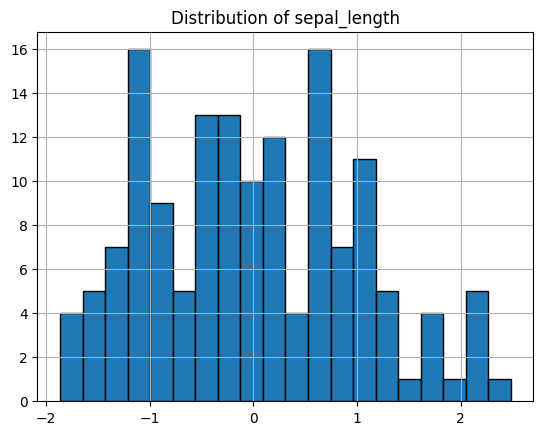

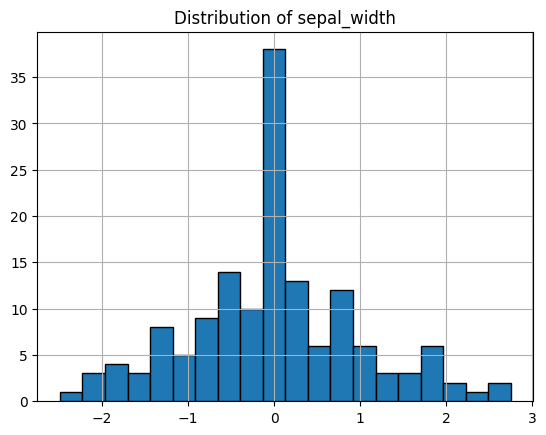

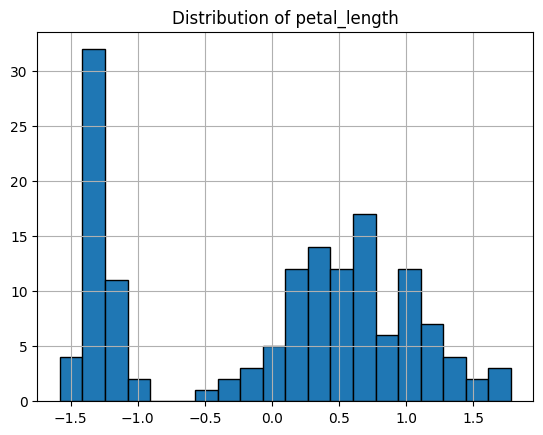

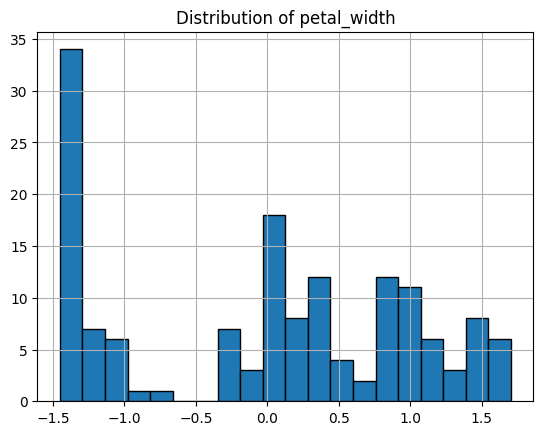

## 🔍 Scatter Plots Between Features

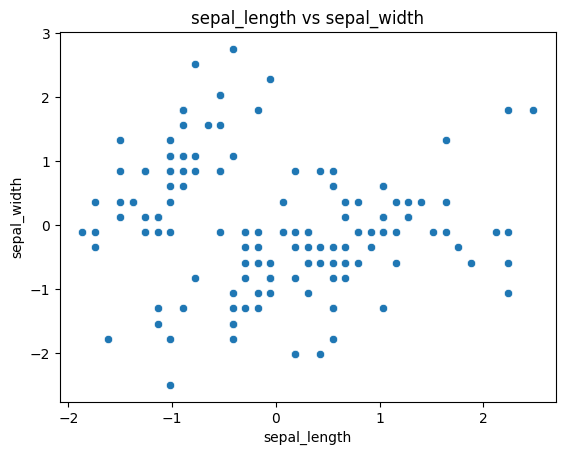

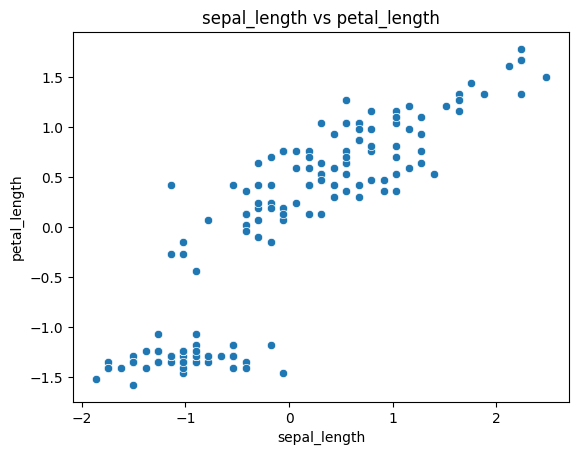

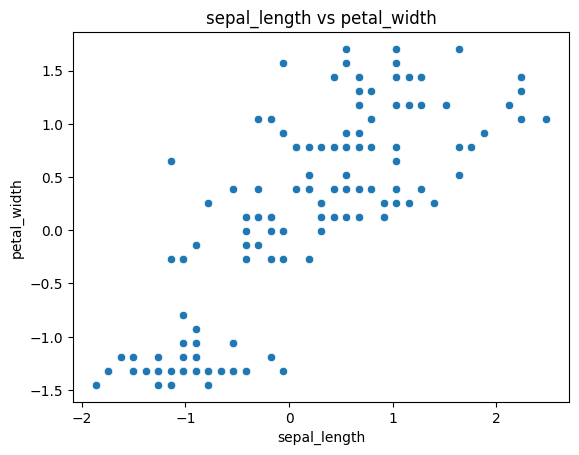

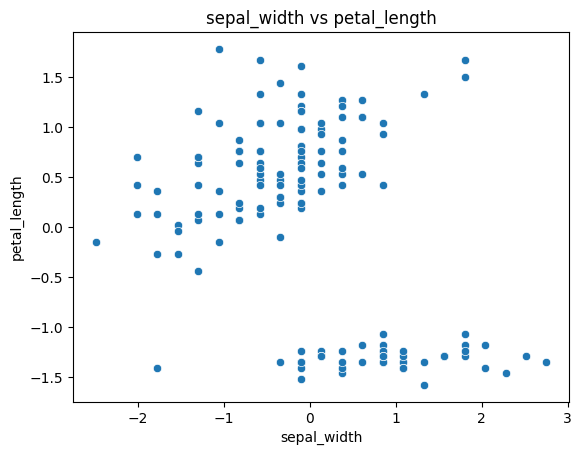

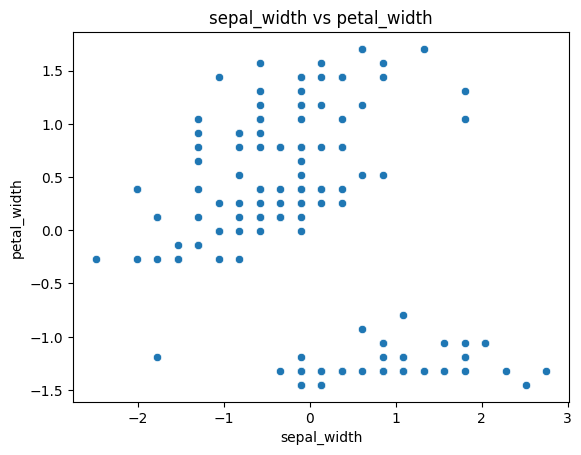

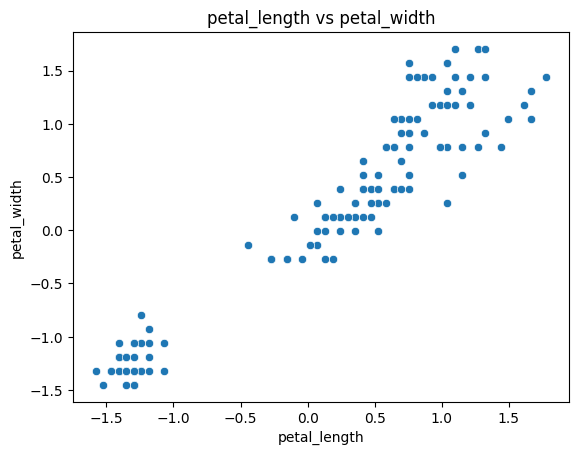

## 📦 Box Plots for Outlier Detection

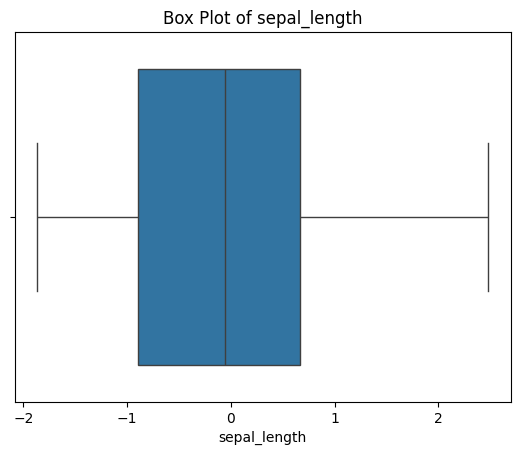

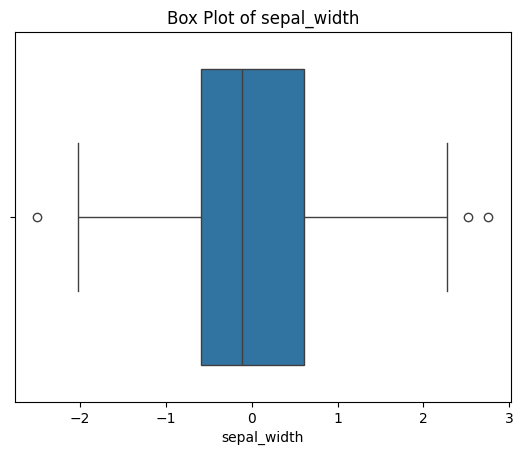

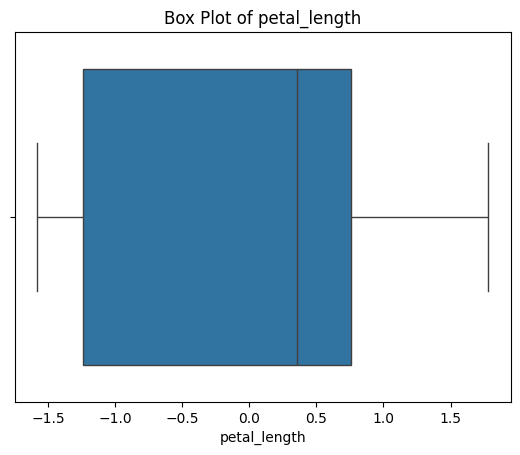

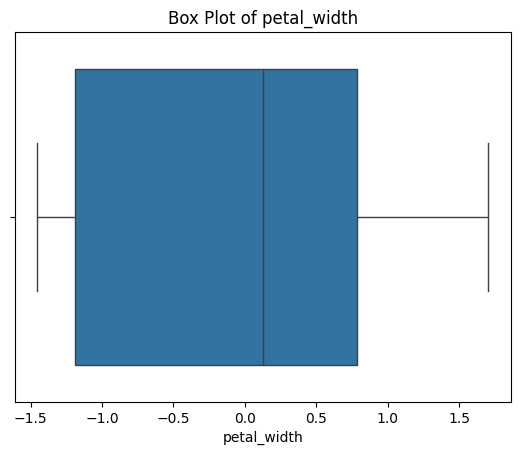

## 🧮 Correlation Matrix (Heatmap)

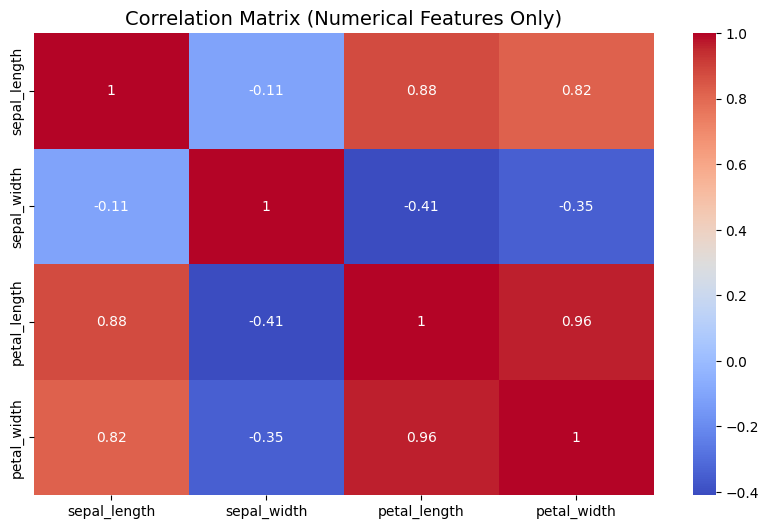

In [ ]:
# File upload and dropdown widgets
file_upload = widgets.FileUpload(accept='.csv', multiple=False)
file_path_selector = widgets.Dropdown(options=[], description="Select File:")

# Load dataset based on input
def load_dataset(file_path=None, file_uploaded=None):
    if file_uploaded:
        return pd.read_csv(file_uploaded)
    elif file_path:
        return pd.read_csv(file_path)
    else:
        return None

# Summary
def display_summary(df):
    display(summary_statistics(df))

# Plots
def display_histograms(df):
    for fig in plot_histograms(df):
        plt.show(fig)

def display_scatter_plots(df):
    for fig in plot_scatter_plots(df):
        plt.show(fig)

def display_box_plots(df):
    for fig in plot_box_plots(df):
        plt.show(fig)

def display_correlation_matrix(df):
    fig = plot_correlation_matrix(df)
    plt.show(fig)

# Dataset selection handler
def on_file_select(change):
    selected_file = file_path_selector.value
    df = load_dataset(file_path=os.path.join(file_path_selector.cleaned_dir, selected_file))

    if df is not None:
        print(f"✅ Dataset '{selected_file}' loaded successfully.")
        run_eda(df)

# File upload handler
def on_file_upload(change):   

    uploaded = list(file_upload.value.values())[0]
    content = uploaded['content']
    df = pd.read_csv(io.BytesIO(content))
    print("✅ Uploaded file loaded successfully.")
    run_eda(df)

# Run EDA
def run_eda(df):
    clear_output(wait=True)
    setup_ui()    

    # 📄 Dataset preview
    display(Markdown("## 📄 Dataset Preview"))    
    display(df.head())

    # 📈 Summary stats
    display(Markdown("## 📈 Summary Statistics"))
    display(summary_statistics(df))

     # 📊 Histograms
    display(Markdown("## 📊 Histograms of Numeric Features"))
    for fig in plot_histograms(df):
        plt.show(fig)

    # 🔍 Scatter plots
    display(Markdown("## 🔍 Scatter Plots Between Features"))
    for fig in plot_scatter_plots(df):
        plt.show(fig)

    # 📦 Box plots
    display(Markdown("## 📦 Box Plots for Outlier Detection"))
    for fig in plot_box_plots(df):
        plt.show(fig)

    # 🧮 Correlation matrix
    display(Markdown("## 🧮 Correlation Matrix (Heatmap)"))
    plt.show(plot_correlation_matrix(df))

# Setup dropdown & upload
def setup_ui():
    # Go up one level from notebooks/ to reach the root workspace
    root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
    cleaned_dir = os.path.join(root_dir, "data", "cleaned")
    
    print(f"Looking for cleaned data in: {cleaned_dir}")    

    if not os.path.exists(cleaned_dir):
        print("❌ Cleaned data folder not found.")
        return
    

    display(Markdown("### 👇 Select or upload a file to begin exploring it."))
    csv_files = [f for f in os.listdir(cleaned_dir) if f.endswith(".csv")]
    
    if not csv_files:
        print("⚠️ No cleaned datasets found in `data/cleaned/`. Please upload one.")
    else:
        file_path_selector.options = csv_files

        # Save the cleaned_dir for access later during selection
        file_path_selector.cleaned_dir = cleaned_dir  # custom attribute
        display(file_path_selector)
        file_path_selector.observe(on_file_select, names='value')

    display(file_upload)
    file_upload.observe(on_file_upload, names='value')

setup_ui()